In [1]:
from importlib.machinery import SourceFileLoader
import numpy as np

In [2]:
wr = SourceFileLoader("mobius", r"../mobius.py").load_module()
cu = SourceFileLoader("mobius_calib_uncert_lmfit", r"..\mobius_calib_uncert_lmfit.py").load_module()
dist = SourceFileLoader("curve_distance", r"..\curve_distance.py").load_module()

wr.initialize('../../Applications/SimplyQ/simplyq.dll')   # .so on Linux

In [3]:
# Load dataset
ds = wr.DataSet.setup_from_parameter_and_input_files('../../Applications/SimplyQ/Tarland/testparameters.dat',
                                                          '../../Applications/SimplyP/Tarland/tarlandinputs.dat')

In [4]:
ds.run_model()

In [5]:
obs = ds.get_input_series('observed Q', [], alignwithresults=True)
sim = ds.get_result_series('Reach flow (daily mean, cumecs)', ['Coull'])

subset = range(100, 200)
obs = obs[subset]
sim = sim[subset]

In [6]:
def printstats(obs, sim, t_scale, maxshift):
    sumabs, sumsq = dist.vertical_distance(obs, sim)
    sumabsdist, sumsqdist = dist.curve_distance(obs, sim, t_scale, maxshift, plotit=True)

    print('sumabs: %f   sumabsdist: %f'%(sumabs, sumabsdist))
    print('sumsq:  %f   sumsqdist:  %f'%(sumsq, sumsqdist))

sumabs: 8.554360   sumabsdist: 6.532608
sumsq:  1.445619   sumsqdist:  0.754355
After shifting sim by 3 steps:
sumabs: 16.194983   sumabsdist: 8.757471
sumsq:  7.293797   sumsqdist:  1.427157


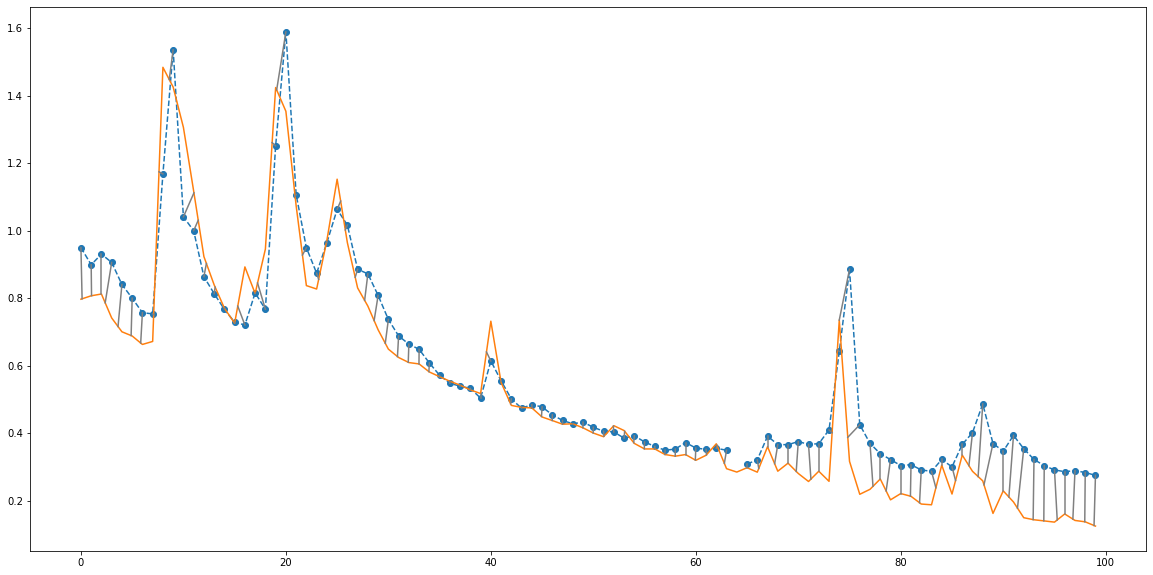

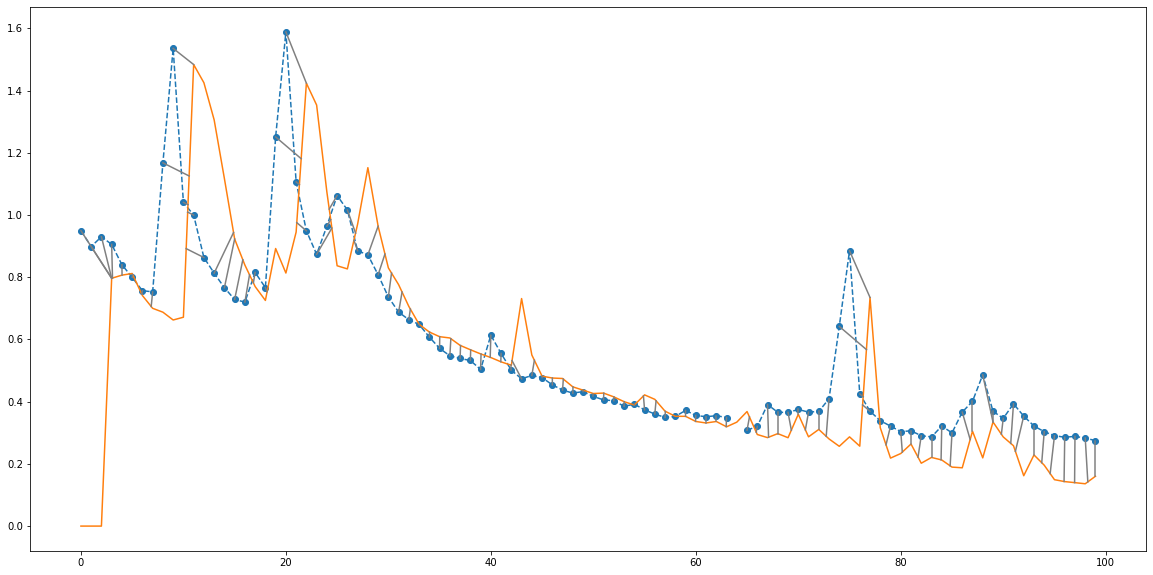

In [7]:
t_scale=0.2
maxshift = 7

printstats(obs, sim, t_scale, maxshift)

#Shift the simulated data by two timesteps
shift = 3
shiftsim = np.roll(sim, shift)
shiftsim[0:shift]=0

print('After shifting sim by %d steps:'%shift)

printstats(obs, shiftsim, t_scale, maxshift)

